# Background

Homework yang diberikan terdapat 2 Tipe soal :
1. Basic (4 soal)
2. Advanced (1 soal)

Homework ini diharapkan mampu memperkuat kembali materi statistika dimulai dari statistika deskriptif, distribusi statistik, pengujian hipotesis, hingga penerapan AB Testing untuk mengetahui hubungan sebab akibat dari suatu kejadian.

Selamat mengerjakan ^^

Daftar Isi :
1. [Persiapan Library](#first-bullet)
2. [Soal 1](#soal1)
3. [Soal 2](#soal2)
4. [Soal 3](#soal3)
5. [Soal 4](#soal4)
6. [Soal 5](#soal5)

# 0. Persiapan Library<a class="anchor" id="first-bullet"></a>

Di sini teman-teman bisa mempersiapkan library yang dibutuhkan untuk melakukan analisa.

In [2]:
## Pandas dan Numpy
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import chi2_contingency
import numpy as np

# Soal 1 <a class="anchor" id="soal1"></a>
Tunjukkan statistika deskriptif untuk variabel harga rumah (Column Name : SalePrice)! 

Ceritakan kepada tim bisnis apa makna dari nilai-nilai tersebut!
## Ekspektasi output : 
* ukuran pemusatan
* ukuran penyebaran
* interpretasi

In [3]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Ukuran Pemusatan

In [6]:
print('modus:',data['SalePrice'].mode()[0])
print('median (50%):',data['SalePrice'].median())
print('mean:',data['SalePrice'].mean())
print('Q1 (25%):',data['SalePrice'].quantile(0.25))
print('Q3 (75%):',data['SalePrice'].quantile(0.75))

modus: 140000
median (50%): 163000.0
mean: 180921.19589041095
Q1 (25%): 129975.0
Q3 (75%): 214000.0


- Modus: Mayoritas harga rumah ada di angka 140,000\$
- Rata-rata: Harga 1 rumah berkisar di angka 180,921\$
- Median: 50% harga rumah berada di bawah 163,000\$ (bisa berlaku sebaliknya)
- Q1: 25% harga rumah berada di bawah 129,975\$
- Q3: 25% harga rumah berada di atas 214,000\$

### Ukuran Penyebaran

In [8]:
print('standard deviation:',data['SalePrice'].std())
print('variance:',data['SalePrice'].var())
print('Inter Quartile Range (IQR):',data['SalePrice'].quantile(0.75)-data['SalePrice'].quantile(0.25))

standard deviation: 79442.50288288663
variance: 6311111264.297451
Inter Quartile Range (IQR): 84025.0


- std/var: harga rumah berkisar antara 180,921 - 79,442 USD sampai 180,921 + 79,442 USD
- interquartile: jarak antara Q3 dan Q1 sebesar 84025.0 USD

# Soal 2 <a class="anchor" id="soal2"></a>
Tunjukkan statistika deskriptif untuk variabel harga rumah (Column Name : SalePrice) setiap tahunnya (Column Name : YrSold)!
Secara deskriptif jelaskan apakah ada perbedaan setiap tahunnya atau tidak?
## Ekspektasi output : 
* ukuran pemusatan
* ukuran penyebaran
* interpretasi

In [5]:
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

In [9]:
agg = {'SalePrice': ['mean','median',q1,q3,'std']}
data_agg = data.groupby('YrSold').agg(agg).reset_index()
data_agg.columns = ['Tahun','Mean','Median','Q1','Q3','Std']
data_agg.sort_values('Mean',ascending = False)

,Tahun,Mean,Median,Q1,Q3,Std
1,2007,186063.151976,167000,129900,219500.0,85768.171410
0,2006,182549.458599,163995,131375,218782.5,79426.838855
3,2009,179432.103550,162000,125250,212750.0,80879.237311
4,2010,177393.674286,155000,128100,213250.0,80451.280085
2,2008,177360.838816,164000,131250,207000.0,69735.610685


Rata-rata harga rumah paling tinggi ada pada tahun 2007. Namun pada tahun tersebut memiliki harga yang paling beragam dibandingkan dengan harga yang lainnya.

# Soal 3  <a class="anchor" id="soal3"></a>
Bagaimana distribusi harga rumah tersebut. Gunakan histogram plot tidak terbatas hanya histogram saja. Jelaskan sebaiknya untuk analisa apakah lebih baik menggunakan mean atau menggunakan median? Beserta alasannya (Column Name : SalePrice)

Ceritakan analisa tersebut dengan sudut pandang statistika. Buatlah tim bisnis paham maksud dari grafik histogram tersebut. 

## Ekspektasi : 
* Grafik Histogram
* Analisa
* Interpretasi

### Grafik Histogram

Text(0.5, 1.0, 'Sale Price Distribution Skewed Right (Positively Skewed)')

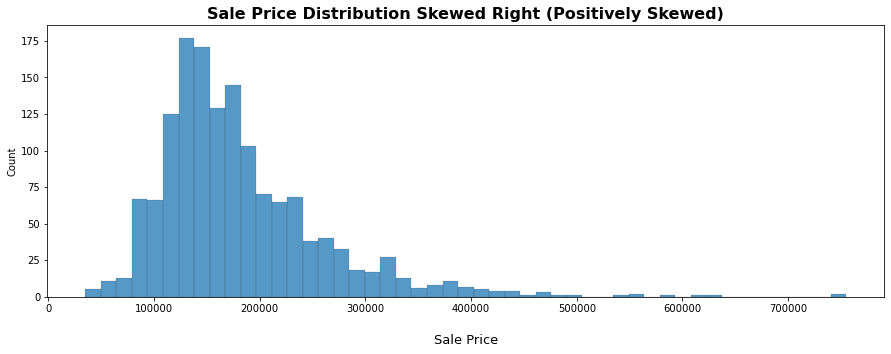

In [12]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data, x='SalePrice', 
                  linewidth=0.1)

# setting 
plt.xlabel('Sale Price', fontsize = 13, labelpad = 20)
plt.title('Sale Price Distribution Skewed Right (Positively Skewed)',
          fontweight='bold',
          fontsize = 16)

Harga rumah memiliki sebaran yang skewed (menceng) dengan arah skewed yang positif. Hal ini menyebabkan jika kita menggunakan rata-rata akan jauh lebih besar dibandingkan dengan menggunakan median. Dan untuk data tersebut lebih baik kita menggunakan median dibandingkan dengan menggunakan rata-rata.

# Soal 4  <a class="anchor" id="soal4"></a>

Karena ada pernyataan bahwa setiap tahunnya harga rumah itu pasti naik. Silahkan teman-teman buktikan dengan data yang ada menggunakan ilmu statistika? (Tidak terbatas pada pengujian apapun)

### Penentuan hipotesis

Apakah setiap tahunnya harga rumah itu pasti naik? Pertama kita harus buktikan terlebih dahulu apakah harga rumah setiap tahunnya sama atau berbeda?

H0 : rata-rata harga rumah setiap tahunnya **sama** <br>
H1 : rata-rata harga rumah setiap tahunnya **berbeda** 

### Pengujian yang digunakan

Kita akan melakukan uji-F (ANOVA)

### Deteksi asumsi beserta cara penanganannya

In [13]:
## Calculate Descriptive Statistics
data_agg = data.groupby('YrSold').agg({'SalePrice': ['mean']}).reset_index()
data_agg.columns = ['Tahun','Mean']
data_agg

,Tahun,Mean
0,2006,182549.458599
1,2007,186063.151976
2,2008,177360.838816
3,2009,179432.103550
4,2010,177393.674286


### Hasil Pengujian Hipotesis

In [14]:
# Hypothesis Testing using ANOVA

df_6 = data[data['YrSold'] == 2006]
df_7 = data[data['YrSold'] == 2007]
df_8 = data[data['YrSold'] == 2008]
df_9 = data[data['YrSold'] == 2009]
df_10 = data[data['YrSold'] == 2010]


ftest = st.f_oneway(df_6['SalePrice'], df_7['SalePrice'], df_8['SalePrice'], df_9['SalePrice'], df_10['SalePrice'])
ftest

F_onewayResult(statistic=0.6455252211679311, pvalue=0.6300887663573457)

In [15]:
p_value = ftest.pvalue
alpha = 0.05
print('P-Value :',p_value)

if p_value >= alpha:
    print('Tidak cukup bukti menyatakan bahwa rata-rata harga rumah setiap tahunnya sama')
else:
    print('Cukup bukti menyatakan (Tolak H0) bahwa rata-rata harga rumah setiap tahunnya berbeda')

P-Value : 0.6300887663573457
Tidak cukup bukti menyatakan bahwa rata-rata harga rumah setiap tahunnya sama


Hasil uji hipotesis menunjukkan bahwa p-value > alpha, maka kita akan mengambil keputusan bahwa tidak ada perbedaan signifikan antara harga rumah untuk setiap tahunnya. 

**Kesimpulan:**
Sehingga, kita dapat menyimpulkan rata-rata sale price house tidak mengalami kenaikan setiap tahunnya.

# Soal 5 <a class="anchor" id="soal5"></a>
Kasus yang akan digunakan adalah membuka akun deposit untuk nasabah bank. Pada kesempatan kali ini data scientist diminta tolong untuk menganalisa hasil ab-testing suatu perusahaan bank. Apakah jumlah campaign mampu meningkatkan keinginan user untuk membuka akun deposit atau tidak?

Data yang digunakan berasal dari folder bank.zip file yang digunakan 
adalah bank-full.csv

1. Untuk variabel jumlah campaign bisa dicek untuk kolom campaign 
2. untuk variabel apakah akhirnya user membuka akun atau tidak bisa menggunakan variabel y

In [17]:
bank = pd.read_csv('bank-full.csv', engine='python', sep=None)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 1 Pemahaman konsep A/B Testing

#### a. Apa nama experimentnya?

AB Testing pengaruh jumlah campaign terhadap user yang akhirnya membuka akun deposit

#### b. Definisikan Hipotesis

semakin banyak campaign yang dilakukan terhadap user maka kemungkinan user akan membuka akun semakin tinggi.

#### c. Siapa participant-nya?

Nasabah bank

#### d. Variabel yang akan diuji apa?

Jumlah campaign

#### e. Metrics apa yang akan digunakan?

**Macroconversions:** jumlah campaign per nasabah

**Microconversions:** jumlah nasabah yang diberi campaign

#### f. Berapa sample size dan durasi experiment?

In [19]:
N = bank.shape[0]
e = 0.05
slovin = N / (1+ N * e**2)
slovin

396.4920742803271

In [20]:
bank_sample = bank.groupby(['y']).apply(lambda x: x.sample(n=200,random_state=123))
bank_sample['y'].value_counts()

no     200
yes    200
Name: y, dtype: int64

**Jadi jumlah sample yang dibutuhkan ada 400 sample, dengan 200 untuk masing-masing conversion group (yes/no).**

durasi experiment akan dilakukan selama 7 hari

### 2. Pengujian Hipotesis

#### a. Penentuan hipotesis

Apakah jumlah campaign mampu meningkatkan keinginan user untuk membuka akun deposit atau tidak?

H0: rata-rata jumlah campaign nasabah yang membuka akun **sama** dengan yang tidak membuka akun  <br>
H1: rata-rata jumlah campaign nasabah yang membuka akun **berbeda** dengan yang tidak membuka akun

#### b. Pengujian yang digunakan

Bisa menggunakan uji-t untuk setiap kategori **membuka akun** dan **tidak membuka akun**. 
(Pengujian tidak terbatas pada uji-t. Jika ada yang ingin menggunakan pengujian yang lain sangat diperbolehkan)

#### c. Deteksi asumsi beserta cara penanganannya

In [34]:
yes = bank[bank['y']=='yes']
no = bank[bank['y']=='no']

In [49]:
yes['campaign'].mean()

2.1410474569861977

In [50]:
no['campaign'].mean()

2.8463503832473322

(0.0, 10.0)

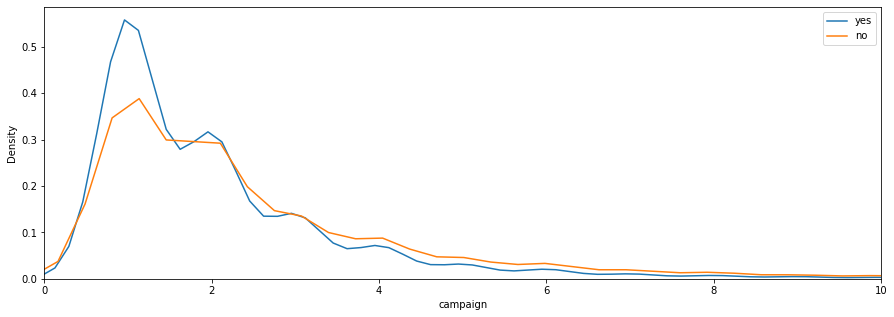

In [51]:
plt.figure(figsize=(15,5))

sns.kdeplot(yes['campaign'],label = 'yes')
sns.kdeplot(no['campaign'], label = 'no')

plt.legend()
plt.xlim(0,10)

In [43]:
print('banyaknya data:',bank.shape[0])

banyaknya data: 45211


#### d. Hasil pengujian hipotesis


In [53]:
# Hypothesis Testing using chi-square
stat, p_value= st.mannwhitneyu(yes['campaign'],no['campaign'])
p_value

9.742452436952554e-72

In [54]:
alpha = 0.05
print('P-Value :',p_value)

if p_value >= alpha:
    print('Tidak cukup bukti jumlah campaign mampu membedakan user untuk membuka akun atau tidak')
else:
    print('cukup bukti jumlah campaign mampu membedakan user untuk membuka akun atau tidak')

P-Value : 9.742452436952554e-72
cukup bukti jumlah campaign mampu membedakan user untuk membuka akun atau tidak


#### e. Kesimpulan dan interpretasi


Hasil uji hipotesis menunjukkan bahwa p-value < alpha, maka kita akan mengambil keputusan bahwa jumlah campaign berpengaruh terhadap nasabah untuk membuka akun atau tidak secara signifikan. 

Namun berdasarkan berdasarkan rata-rata ternyata semakin banyak campaign yang diberikan ternyata user akan semakin menolak membuka akun.

Jadi kesimpulannya, jumlah campaign berhubungan terbalik dengan user membuka akun.